In [3]:
import yfinance as yf
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')  # Or use 'TCS.NS'
data.to_csv('stock_data.csv')

C:\Users\nithy\AppData\Local\Temp\ipykernel_17568\2591091435.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')  # Or use 'TCS.NS'
[*********************100%***********************]  1 of 1 completed


C:\Users\nithy\AppData\Local\Temp\ipykernel_17568\1014507853.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
C:\Users\nithy\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nithy\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nithy\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is avail

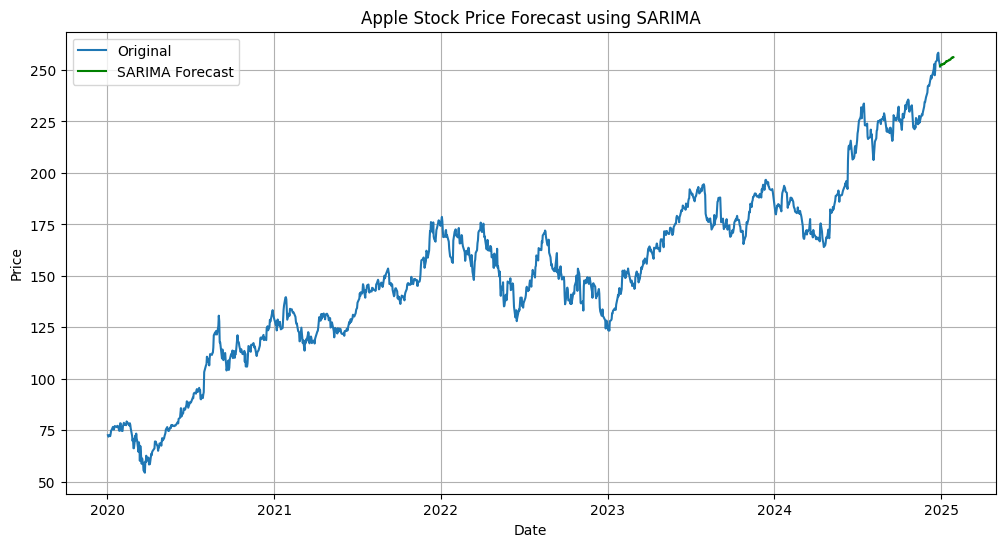

In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
close_prices = data['Close']
model = SARIMAX(close_prices,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))  # seasonal_order = (p,d,q,seasonal_period)

model_fit = model.fit()
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label="Original")
plt.plot(pd.date_range(start=close_prices.index[-1], periods=30, freq='D'),
         forecast, color='green', label="SARIMA Forecast")
plt.title("Apple Stock Price Forecast using SARIMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()